### Good and bad classification 
1. 基于 data_class-raw.csv 数据，根据高期分布概率密度函数，寻找异常点并剔除。
2. 基于 data_class_processed.csv 数据，进行 PCA 处理，确定重要数据的维度及成分。
3. 完成数据分离，数据分离参数： random_state=4, test_size=0.4。
4. 建立 KNN 模型完成分类，n_neighbors 取 10，计算分类准确率，可视化分类边界。
5. 计算测试数据集对应的混淆矩阵，计算准确率，如回率，特异度、精确率，F1 分数。
6. 尝试不同的 n_neighbors (1-20), 计算其在训练数据集，测试数据集集上的准确率并画图。


In [1]:
# Load the data
import pandas as pd
import numpy as np
data = pd.read_csv("data_class_raw.csv")
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [2]:
# Define X and y
X = data.drop(['y'], axis = 1)
y = data.loc[:, 'y']

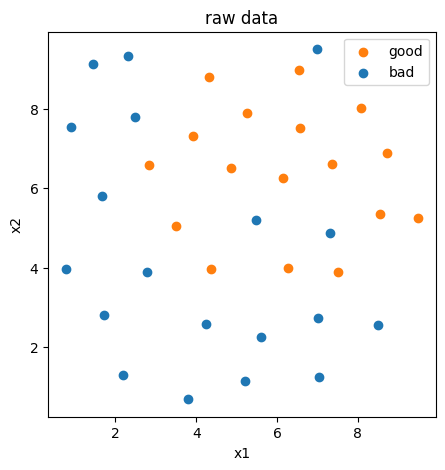

In [4]:
# Visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize = (5, 5))
bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])
plt.legend((good, bad), ('good', 'bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
# Anomay detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination = 0.02)
ad_model.fit(X[y == 0])
y_predict_bad = ad_model.predict(X[y == 0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


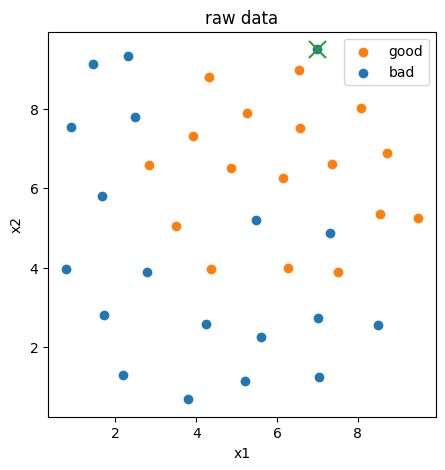

In [10]:
# Visualize predict data
from matplotlib import pyplot as plt
fig2 = plt.figure(figsize = (5, 5))
bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])
plt.scatter(X.loc[:, 'x1'][y == 0][y_predict_bad == -1],
            X.loc[:, 'x2'][y == 0][y_predict_bad ==  -1], marker= 'x', s = 150)
plt.legend((good, bad), ('good', 'bad'))
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [12]:
# PCA  decompostion data
data = pd.read_csv('data_class_processed.csv')
data.head()
# Define X and y
X = data.drop(['y'], axis = 1)
y = data.loc[:, 'y']


[0.5369408 0.4630592]


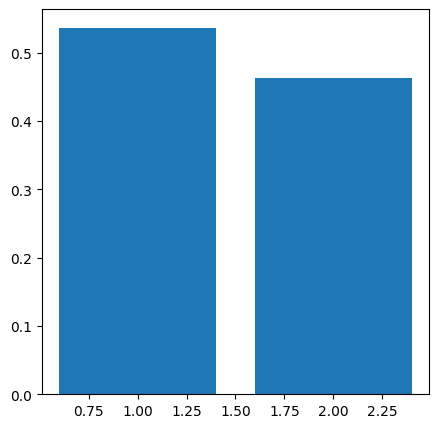

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standard process
X_norm = StandardScaler().fit_transform(X)
# PCA decompostion
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure(figsize = (5, 5))
plt.bar([1, 2], var_ratio)
plt.show()

In [19]:
# Train and test split: random_state = 4, test_size = 0.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.4)
print(X_train.shape, X_test.shape, X.shape)

(21, 2) (14, 2) (35, 2)


In [20]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

In [23]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
print("trianing accuracy:", accuracy_train)
print("testing accuracy:", accuracy_test)

trianing accuracy: 0.9047619047619048
testing accuracy: 0.6428571428571429


In [25]:
# Visualize the KNN result and boundary
xx, yy = np.meshgrid(np.arange(0, 10, 0.05), np.arange(0, 10, 0.05))
print(yy.shape)

(200, 200)


In [27]:
x_range = np.c_[xx.ravel(), yy.ravel()]
print(x_range.shape)

(40000, 2)


In [30]:
y_range_predict = knn_10.predict(x_range)


/opt/homebrew/anaconda3/envs/learn_ai/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[0 0 0 ... 1 1 1]


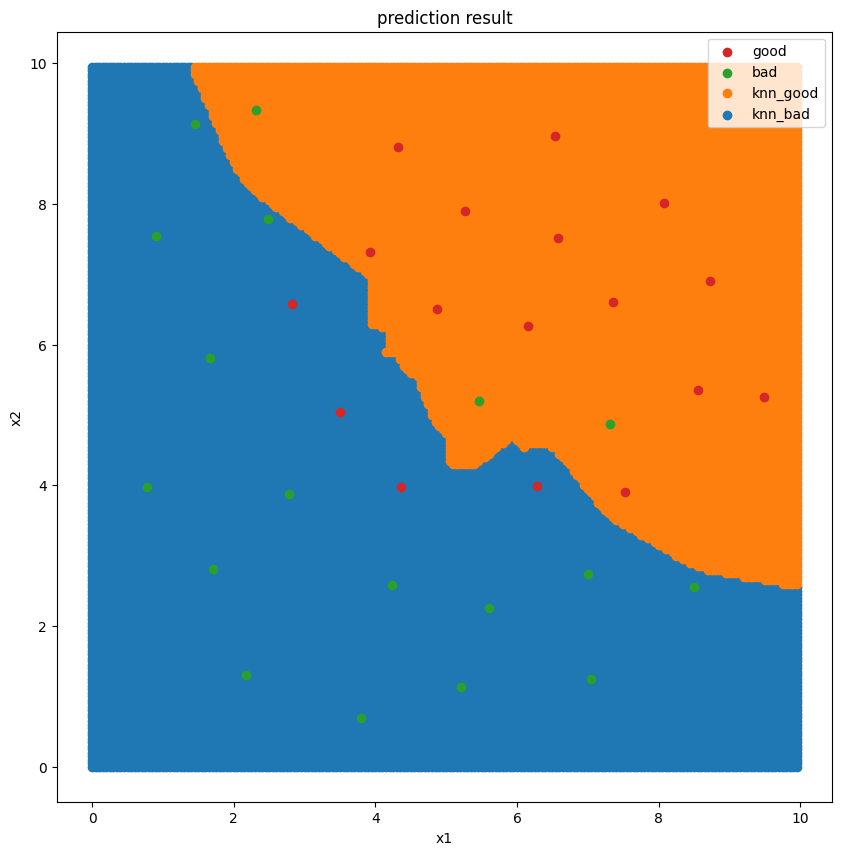

In [32]:
fig4 = plt.figure(figsize = (10, 10))
knn_bad = plt.scatter(x_range[:,0][y_range_predict == 0], x_range[:,1][y_range_predict==0])
knn_good = plt.scatter(x_range[:,0][y_range_predict == 1], x_range[:,1][y_range_predict==1])

bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])


plt.legend((good, bad, knn_good, knn_bad), ('good', 'bad', 'knn_good', 'knn_bad'))
plt.title('prediction result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [33]:
# Confusion matrix calucaltion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
print(cm)

[[4 2]
 [3 5]]


In [35]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print(TP, TN, FP, FN)

5 4 2 3


In [36]:
# Accuracy Rate: 整体样本中，预测正确样本数的比例
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy)

0.6428571428571429


In [37]:
# Sensitivity(召回率): 正样本中，预测正确的比例
recall = TP / (TP + FN)
print(recall)

0.625


In [38]:
# Specificity (特异度): 负样本中，预测正确的比例
specificity = TN / (TN + FP)
print(specificity)

0.6666666666666666


In [39]:
# Precision: 预测结果为正样本中，预测正确的比例
precision = TP / (TP + FP)
print(precision)

0.7142857142857143


In [40]:
# F1 Score: 综合 Precision 和 Recall 的一个判断指标
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.6666666666666666


In [45]:
# Try different k and calcualate the accuracy for each
n = [i for i in range(1, 21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    accuracy_train_i = accuracy_score(y_train, y_train_predict)
    accuracy_test_i = accuracy_score(y_test, y_test_predict)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
print(accuracy_train)
print(accuracy_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714]
[0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


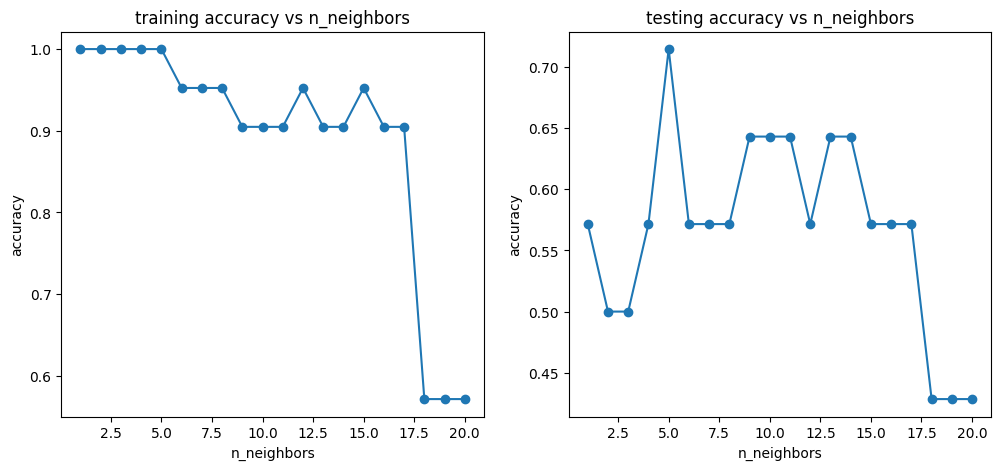

In [47]:
# Visualize different k
fit5 = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(n, accuracy_train, marker = 'o')
plt.title("training accuracy vs n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")

plt.subplot(122)
plt.plot(n, accuracy_test, marker = 'o')
plt.title("testing accuracy vs n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

### Good and bad classification summary
1. 通过进行异常检测，帮助找到了潜在的异常数据点。
2. 通过 PAC 分析， 发现需要保留 2 维数据集。
3. 实现了训练数据与测试数据的分离，并计算模型对于测试数据的预测准确率。
4. 计算得到混淆矩阵，更模型更全面的评估。
5. 通过新的方法可视化分类的决策边界。
6. 通过调整就可以参数 n_neighbors 值，在计算对应准确率，可以帮助我们更好的确定使用哪个模型。
7. 核心算法参考链接: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
